In [112]:
import os
import sys
sys.path.append('../../')
from src.compress_sensing_library import reconstruct, generate_V1_variables, error_calculation
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import pywt

In [2]:
root = '/home/bans/Documents/research/'

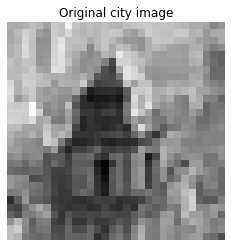

In [154]:
image_nm = 'image/city_part2.png'
save_nm = image_nm.split('/')[1].split('.')[0]
img = Image.open(os.path.join(root + image_nm))
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.axis('off')
plt.title('Original city image')
plt.imshow(img_arr, 'gray')

num_cell = 500
cell_size = 7
cell_freq = 2
alpha = 1
dwt_type =  'db1'

In [155]:
pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

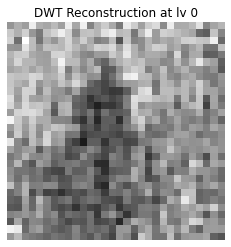

Error: 25.528779773939764


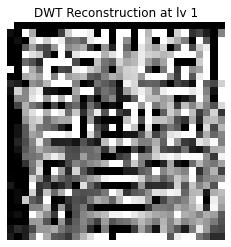

Error: 220.70848202121644


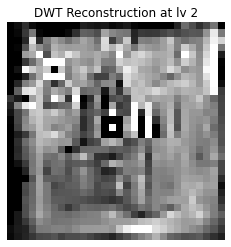

Error: 92.05821817412797


/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


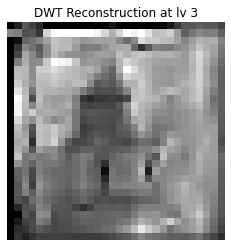

Error: 61.44627232677707


/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


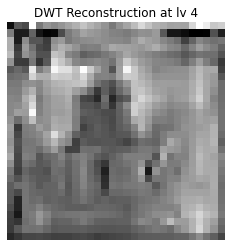

Error: 41.155938457347254


/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


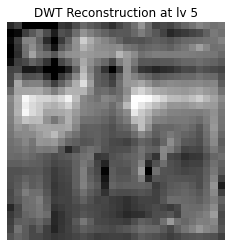

Error: 60.96279463582615


In [156]:
W, y = generate_V1_variables(num_cell, cell_size, cell_freq, img_arr)
save_path = os.path.join(root, '/result/dwt/city_part2/V1/dwt_type/{dwt_type}/'.format(dwt_type = dwt_type))

# if not os.path.isdir(os.path.join(root, save_path)):
#     try: 
#         os.makedirs(os.path.join(root, save_path))
#     except OSError:
#         pass

for lv in [0, 1, 2, 3, 4, 5] :
    theta, reconst, s = reconstruct(W, y, method = 'dwt', lv = lv, dwt_type = dwt_type)
    plt.title("DWT Reconstruction at lv {lv}".format(lv = lv))
    plt.axis('off')
    plt.imshow(reconst, 'gray', vmin = 0, vmax = 255)
    plt.clim(0, 256)
    plt.savefig("Reconstruction_lv_{lv}.png".format(lv = lv), dpi = 300)
    plt.show()
    print("Error:", error_calculation(img_arr, reconst))
    

In [157]:
os.path.join(root, save_path)

'/result/dwt/city_part2/V1/dwt_type/coif1/'

In [105]:
wavelist()

NameError: name 'wavelist' is not defined